In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#kmeans
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.pipeline import Pipeline


In [5]:
data = load_iris(as_frame = True)

In [6]:
## Train the model Using Kmeans Clustering by setting the parameter as following:

## "init": "random",    "n_init": 50,    "max_iter": 500,    "random_state": 10

In [10]:
data.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [14]:
# check null values
data.data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<Axes: >

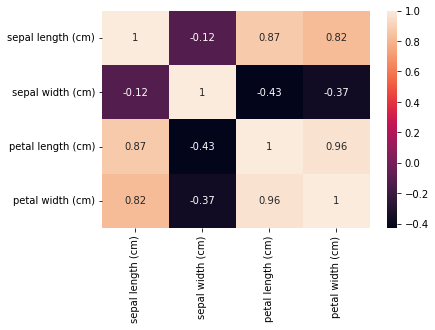

In [18]:
# Which feature pair has the highest correlation cofficient value.
sns.heatmap(data.data.corr(), annot = True)

In [19]:
kmeans_kwargs = {"init": "random",
                 "n_init": 50,
                 "max_iter": 500,
                 "random_state": 10
                 }

In [23]:
pipe = Pipeline([("preprocess", StandardScaler()),
                 ("clustering", KMeans(**kmeans_kwargs))
                 ])

pipe.fit(data.data, data.target)

Pipeline(steps=[('preprocess', StandardScaler()),
                ('clustering',
                 KMeans(init='random', max_iter=500, n_init=50,
                        random_state=10))])

In [31]:
## Enter the value of the ' inertia_' score Keeping k=5.


4.58264605160078

In [39]:
ls = []


for k in range(1,12):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(data.data, data.target)
  ls.append(kmeans.inertia_)
     

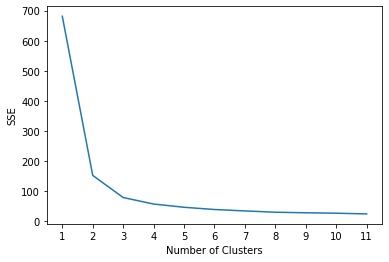

In [40]:
plt.plot(range(1,12), ls)
plt.xticks(range(1,12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [41]:
ls

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.29822966507178,
 30.01588095238096,
 28.14693893387315,
 26.72362757237603,
 24.374128327812535]

In [38]:
pipe = Pipeline([("clustering", KMeans(n_clusters = 5,**kmeans_kwargs))
                 ])

pipe.fit(data.data, data.target)
pipe[-1].inertia_

46.446182051282065

Load the iris dataset from sklearn.

Remove the rows if it contain NULL values.

Train the model using Agglomerative Clustering by setting the parameter as following


`n_clusters=3`,`affinity='euclidean'`, `linkage='ward'`

In [64]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the iris dataset
iris = load_iris()

# Remove rows with NULL values
X = iris.data[~np.isnan(iris.data).any(axis=1)]

# Train the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X)

# Predict the labels for the last row of the sample
agg_clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [66]:
agg_clustering.n_leaves_

150

In [67]:
agg_clustering.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])